In [ ]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go


In [ ]:
# Load the dataset
file_path = r"C:\Users\Farru\Downloads\Diabetic\data\diabetes_012_health_indicators_BRFSS2015.csv"
health_indicators = pd.read_csv(file_path)

# Calculate the number of rows for each class
class_counts = health_indicators['Diabetes_012'].value_counts()

# Calculate the class distribution as percentages
class_distribution = health_indicators['Diabetes_012'].value_counts(normalize=True) * 100

# Display the number of rows for each class and their distribution
print("Number of rows for each class:")
for cls, count in class_counts.items():
    print(f"Class {int(cls)}: {count} rows")

print("\nClass Distribution (as percentages):")
for cls, proportion in class_distribution.items():
    print(f"Class {int(cls)}: {proportion:.2f}%")

In [ ]:
# 1. Check class distribution
class_counts = health_indicators['Diabetes_012'].value_counts()
print("Class Counts:\n", class_counts)

In [ ]:
# 2. Strategies to Address Imbalance
# a. Oversampling (SMOTE or Random Oversampling)
# Oversample the minority classes to balance the dataset. SMOTE (Synthetic Minority Oversampling Technique) is particularly effective as it generates synthetic samples for minority classes.

from imblearn.over_sampling import SMOTE

# Features and target
X = health_indicators.drop(columns=['Diabetes_012'])
y = health_indicators['Diabetes_012']

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
from collections import Counter
print("Resampled Class Distribution:", Counter(y_resampled))

In [ ]:
# b. Undersampling
# Reduce the number of majority class samples. Be cautious as it may lead to a loss of information.

from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check the new class distribution
print("Resampled Class Distribution:", Counter(y_resampled))

In [ ]:
# c. Combination of Oversampling and Undersampling
# Balance the dataset by combining SMOTE (oversampling) for minority classes and random undersampling for the majority class.

from imblearn.combine import SMOTEENN

# Combine SMOTE and ENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Check the new class distribution
print("Resampled Class Distribution:", Counter(y_resampled))

In [ ]:
# d. Weighted Loss Function
# When training models like decision trees, random forests, or neural networks, assign weights to classes inversely proportional to their frequency.

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Class Weights:", class_weight_dict)

In [ ]:
# e. Ensemble Methods
# Use ensemble models like Random Forests, Gradient Boosting, or XGBoost, which inherently handle class imbalance well. Additionally, you can use 
#sampling techniques with these models.

from sklearn.ensemble import RandomForestClassifier

# Train a random forest with class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X, y)

In [ ]:
# 3. Evaluation Metrics
# Instead of accuracy, focus on metrics that consider class imbalance, such as:

# Precision, Recall, and F1-Score (especially per class)
# Area Under the ROC Curve (AUC-ROC)
# Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X)

# Evaluate the model
print("Classification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

In [ ]:
# 4. Feature Engineering and Dimensionality Reduction
# Explore correlations among features and reduce redundancy. Use techniques like PCA (Principal Component Analysis) if needed.
'''This code performs feature engineering and dimensionality reduction using Principal Component Analysis (PCA), a technique commonly used 
in machine learning and data preprocessing to reduce the number of features in a dataset while retaining as much variance as possible. Here's 
a detailed explanation of what the code is doing:'''

from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
print(X_pca)  

In [ ]:
# 5. Cross-Validation
# Perform stratified k-fold cross-validation to ensure balanced splits during training and evaluation.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

# Define StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize list to store fold accuracies
fold_accuracies = []

for train_index, test_index in skf.split(X, y):
    # Split data into training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and fit pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=1000, solver='saga'))
    ])
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)
    print(f"Fold Accuracy: {accuracy:.2f}")

# Print average accuracy across folds
average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
print(f"Average Cross-Validation Accuracy: {average_accuracy:.2f}")


In [ ]:
# 1. Validate SMOTE Resampling
#Ensure the resampled data maintains the integrity of feature distributions. You can visualize the features using histograms or box plots for each class to verify no significant distortions occurred during SMOTE.

import seaborn as sns

# Visualize a feature before and after SMOTE
feature = 'Age'  # Example feature
sns.kdeplot(data=X['Age'], label='Original', fill=True)
sns.kdeplot(data=X_resampled['Age'], label='Resampled', fill=True)
plt.title('Feature Distribution Before and After SMOTE')
plt.legend()
plt.show()


Original Class Distribution: Counter({0.0: 213703, 2.0: 35346, 1.0: 4631})
Resampled Class Distribution: Counter({0.0: 213703, 2.0: 213703, 1.0: 213703})


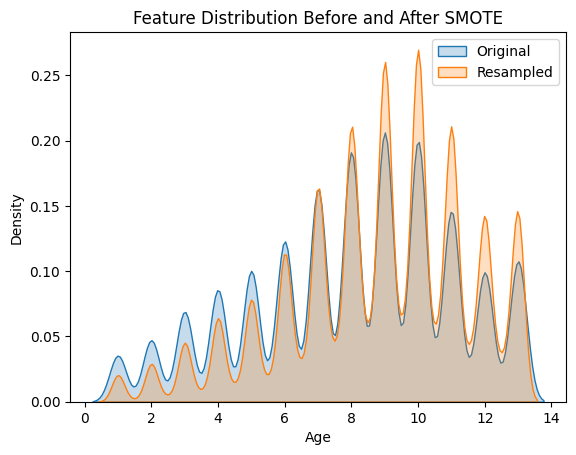

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = r"C:\Users\Farru\Downloads\Diabetic\data\diabetes_012_health_indicators_BRFSS2015.csv"
health_indicators = pd.read_csv(file_path)

# Features and target
X = health_indicators.drop(columns=['Diabetes_012'])
y = health_indicators['Diabetes_012']

# Check class distribution
print("Original Class Distribution:", Counter(y))

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Resampled Class Distribution:", Counter(y_resampled))

# Visualize feature distribution before and after SMOTE
feature = 'Age'  # Example feature to visualize
sns.kdeplot(data=X['Age'], label='Original', fill=True)
sns.kdeplot(data=X_resampled['Age'], label='Resampled', fill=True)
plt.title('Feature Distribution Before and After SMOTE')
plt.legend()
plt.show()

# StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to train and evaluate models
def train_and_evaluate(model, model_name):
    fold_accuracies = []
    fold_auc = []

    for train_index, test_index in skf.split(X_resampled, y_resampled):
        # Split data into training and test sets
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

        # Create and fit pipeline
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=5)),  # PCA after scaling
            ('model', model)
        ])
        pipeline.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = pipeline.predict(X_test)
        fold_accuracies.append(accuracy_score(y_test, y_pred))

        # Handle models with predict_proba
        if hasattr(model, "predict_proba"):
            y_pred_proba = pipeline.predict_proba(X_test)
            # Check if the model supports multi-class probabilities
            if y_pred_proba.shape[1] > 1:  # Multi-class
                auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
            else:  # Binary classification
                auc = roc_auc_score(y_test, y_pred_proba[:, 0])
            fold_auc.append(auc)

    # Results
    avg_accuracy = np.mean(fold_accuracies)
    avg_auc = np.mean(fold_auc) if fold_auc else None
    print(f"Model: {model_name}")
    print(f"Average Cross-Validation Accuracy: {avg_accuracy:.2f}")
    if avg_auc:
        print(f"Average Cross-Validation AUC: {avg_auc:.2f}")
    print()

# Models to evaluate
models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(class_weight='balanced', random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Evaluate each model
for name, model in models.items():
    train_and_evaluate(model, name)
